In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [62]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
iris[iris['sepal_width']>4] # dataframe where sepal width is greater than 4

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [64]:
iris[iris['petal_width']>1] # dataframe where petal width is greater than 1

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


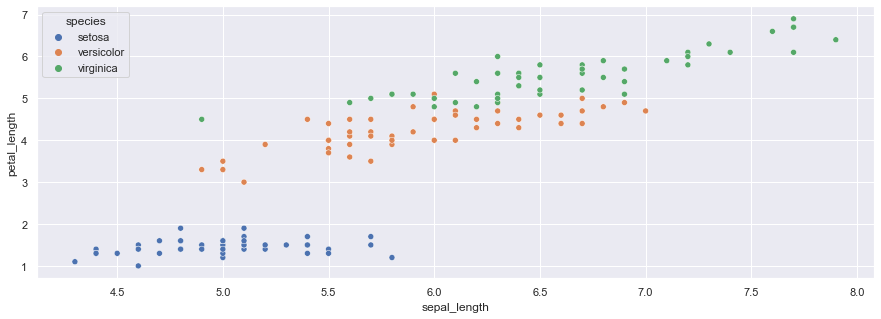

In [65]:
sns.scatterplot(iris['sepal_length'],iris['petal_length'],hue=iris['species'])
plt.show()

##  Simple Linear Regression 

In [ ]:
# Tips : split--> train-fit--> predict--> check error/accuracy

In [66]:
y = iris[['sepal_length']]     # dependent variable

In [67]:
x = iris[['sepal_width']]       # independent variable

In [68]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)    # 30% test ...70 %train    

In [69]:
x_train.head(2),x_test.head(2),y_train.head(2),y_test.head(2) # train and test sets

(    sepal_width
 74          2.9
 84          3.0,
      sepal_width
 121          2.8
 114          2.8,
     sepal_length
 74           6.4
 84           5.4,
      sepal_length
 121           5.6
 114           5.8)

In [70]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

In [71]:
slr.fit(x_train,y_train)

LinearRegression()

In [72]:
y_pred = slr.predict(x_test)

In [73]:
y_test.head(5)      # actual values

,sepal_length
121,5.6
114,5.8
110,6.5
100,6.3
25,5.0


In [74]:
y_pred[0:5]     # predicted values

array([[5.88097483],
       [5.88097483],
       [5.77895686],
       [5.75345236],
       [5.82996584]])

In [75]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)            

0.492507566382633

## Multiple Linear Regression 

In [76]:
 y = iris[['sepal_length']]    # dependent varible

In [77]:
x =  iris [['sepal_width','petal_length','petal_width']] # independent varibles 

In [141]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3)    # 30% test ...70 %train    

In [79]:
x_train.head(2),x_test.head(2),y_train.head(2),y_test.head(2) # train and test sets

(    sepal_width  petal_length  petal_width
 99          2.8           4.1          1.3
 18          3.8           1.7          0.3,
     sepal_width  petal_length  petal_width
 50          3.2           4.7          1.4
 96          2.9           4.2          1.3,
     sepal_length
 99           5.7
 18           5.7,
     sepal_length
 50           7.0
 96           5.7)

In [80]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

In [81]:
mlr.fit(x_train,y_train)

LinearRegression()

In [82]:
y_pred = mlr.predict(x_test)

In [83]:
y_test.head(5) # actual values

,sepal_length
50,7.0
96,5.7
102,7.1
141,6.9
124,6.7


In [84]:
y_pred[0:5]    # predicted values 

array([[6.5210285 ],
       [6.0144035 ],
       [6.8342564 ],
       [6.1775744 ],
       [6.88401972]])

In [85]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)    

0.09850811145705468

In [86]:
## SImple linear reg  model mse > multiple linear reg model mse

## SImple linear reg  model accuracy < multiple linear reg model accuracy

# less mse..more accuracy 

### Covid-19 Data Linear Regression Example

#### Few EDA 

In [142]:
df = pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)    # parsing date column as Date format not string
df.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [143]:
df = df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']] # extracting required columns

df.columns = ['date','state','cured','deaths','confirmed'] # renaming columns

In [144]:
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [90]:
df.tail()

,date,state,cured,deaths,confirmed
14505,2021-05-03,Telangana,373933,2417,456485
14506,2021-05-03,Tripura,33782,399,35723
14507,2021-05-03,Uttarakhand,135206,2802,191620
14508,2021-05-03,Uttar Pradesh,1004447,13162,1313361
14509,2021-05-03,West Bengal,733359,11539,863393


In [91]:
max(df['date'])

Timestamp('2021-05-03 00:00:00')

In [92]:
today = df [df['date']=='2021-05-03']
today.head() # todays statewise stats

,date,state,cured,deaths,confirmed
14474,2021-05-03,Andaman and Nicobar Islands,5798,69,6084
14475,2021-05-03,Andhra Pradesh,993708,8136,1145022
14476,2021-05-03,Arunachal Pradesh,17273,59,18738
14477,2021-05-03,Assam,231703,1360,258961
14478,2021-05-03,Bihar,384955,2739,497640


In [93]:
# sorting data for today in descneding order of confirmed cases and showing max 5 confirmed cases for today

sorted_data_today = today.sort_values(by = 'confirmed', ascending=False)
sorted_data_today.head(10)

,date,state,cured,deaths,confirmed
14494,2021-05-03,Maharashtra,3981658,70284,4722401
14490,2021-05-03,Kerala,1293590,5405,1638778
14489,2021-05-03,Karnataka,1164398,16011,1601865
14508,2021-05-03,Uttar Pradesh,1004447,13162,1313361
14504,2021-05-03,Tamil Nadu,1072322,14346,1207112
14482,2021-05-03,Delhi,1085690,16966,1194946
14475,2021-05-03,Andhra Pradesh,993708,8136,1145022
14509,2021-05-03,West Bengal,733359,11539,863393
14480,2021-05-03,Chhattisgarh,627051,9009,756427
14502,2021-05-03,Rajasthan,440215,4558,633951


In [94]:
sorted_data_today = today.sort_values(by = 'deaths', ascending=False)
top_five_today_deaths = sorted_data_today.head(5)
top_five_today_deaths

,date,state,cured,deaths,confirmed
14494,2021-05-03,Maharashtra,3981658,70284,4722401
14482,2021-05-03,Delhi,1085690,16966,1194946
14489,2021-05-03,Karnataka,1164398,16011,1601865
14504,2021-05-03,Tamil Nadu,1072322,14346,1207112
14508,2021-05-03,Uttar Pradesh,1004447,13162,1313361


In [95]:
sorted_data_today = today.sort_values(by = 'confirmed', ascending=False)
top_five_today_confirmed = sorted_data_today.head(5)
top_five_today_confirmed

,date,state,cured,deaths,confirmed
14494,2021-05-03,Maharashtra,3981658,70284,4722401
14490,2021-05-03,Kerala,1293590,5405,1638778
14489,2021-05-03,Karnataka,1164398,16011,1601865
14508,2021-05-03,Uttar Pradesh,1004447,13162,1313361
14504,2021-05-03,Tamil Nadu,1072322,14346,1207112


<AxesSubplot:xlabel='state', ylabel='confirmed'>

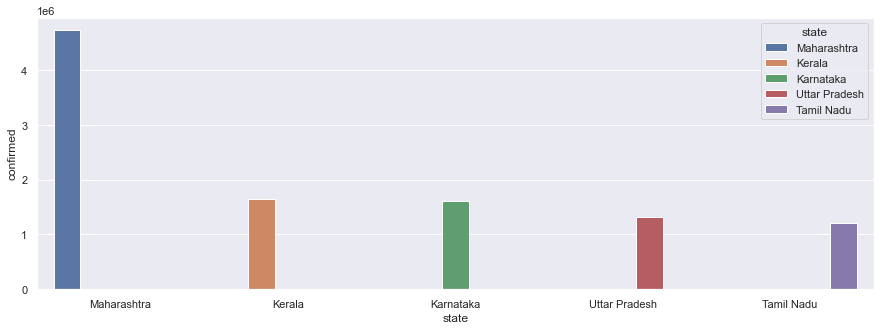

In [96]:
# plotting data for confirmed cases for top 5 states
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(top_five_today_confirmed['state'],top_five_today_confirmed['confirmed'], hue=top_five_today_confirmed['state'])

<AxesSubplot:xlabel='state', ylabel='deaths'>

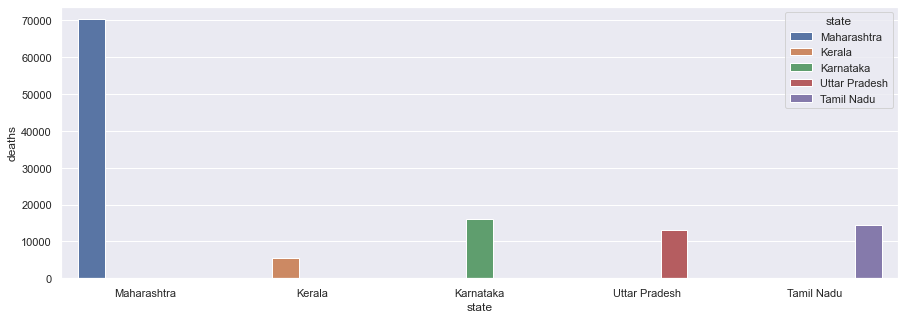

In [97]:
# plotting data for death cases for top 5 states
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(top_five_today_confirmed['state'],top_five_today_confirmed['deaths'], hue=top_five_today_confirmed['state'])

In [98]:
# cases specific to west bengal

df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [146]:
wb_data = df[df['state']=='West Bengal']
wb_data.head()

,date,state,cured,deaths,confirmed
208,2020-03-18,West Bengal,0,0,1
227,2020-03-19,West Bengal,0,0,1
247,2020-03-20,West Bengal,0,0,2
269,2020-03-21,West Bengal,0,0,3
292,2020-03-22,West Bengal,0,0,4


<AxesSubplot:xlabel='date', ylabel='confirmed'>

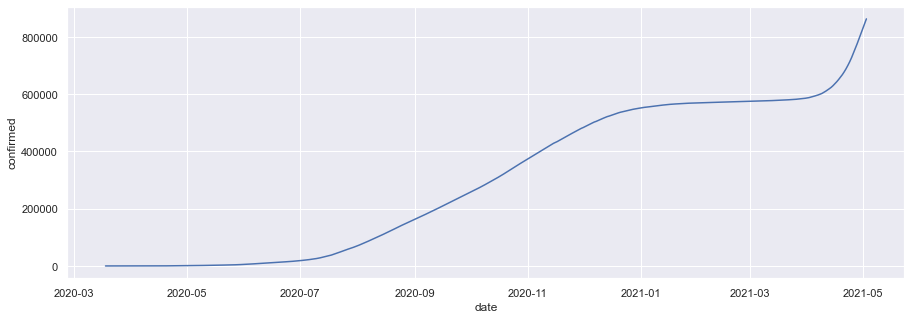

In [100]:
# plotting data for confirmed in west bengal
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(wb_data['date'],wb_data['confirmed'])

<AxesSubplot:xlabel='date', ylabel='deaths'>

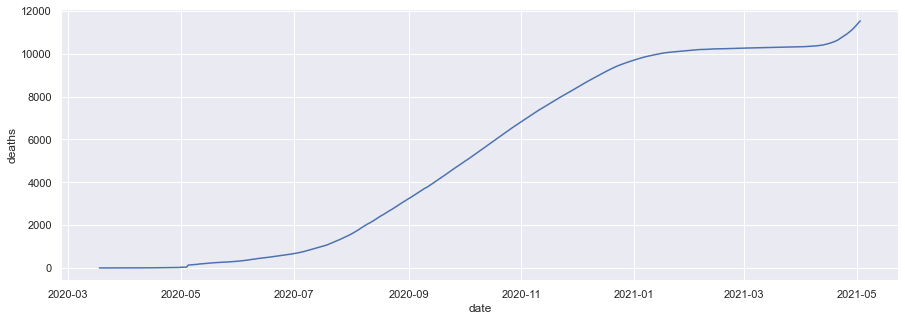

In [101]:
# plotting data for deaths in west bengal
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(wb_data['date'],wb_data['deaths'])

#### Linear Regression Analysis 

In [ ]:
# Tips : split--> train-fit--> predict--> check error/accuracy

In [148]:
wb_data_temp = wb_data.copy()
wb_data_temp.head()

,date,state,cured,deaths,confirmed
208,2020-03-18,West Bengal,0,0,1
227,2020-03-19,West Bengal,0,0,1
247,2020-03-20,West Bengal,0,0,2
269,2020-03-21,West Bengal,0,0,3
292,2020-03-22,West Bengal,0,0,4


In [138]:
wb_data_temp['date'].dtype  #datetype

dtype('<M8[ns]')

In [149]:
wb_data_temp['date'] = wb_data['date'].map(dt.datetime.toordinal)

In [150]:
wb_data_temp['date'].dtype # converting to dtae-time to ordinal

dtype('int64')

In [ ]:
# we want to see the effect of date on deaths in west bengal

In [151]:
x = wb_data_temp['date'] # independent / cause variable

y = wb_data_temp['deaths'] # dependent/ effect variable

In [152]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.3)

In [153]:
x_train.head(2),x_test.head(2),y_train.head(2),y_test.head(2) # train and test sets

(4530     737632
 12205    737849
 Name: date, dtype: int64,
 6770    737696
 6875    737699
 Name: date, dtype: int64,
 4530      1332
 12205    10266
 Name: deaths, dtype: int64,
 6770    4781
 6875    4958
 Name: deaths, dtype: int64)

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
slr = LinearRegression()

In [156]:
slr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))  # trained model with train data

LinearRegression()

In [157]:
wb_data_temp.tail()

,date,state,cured,deaths,confirmed
14365,737909,West Bengal,676581,11159,793552
14401,737910,West Bengal,689466,11248,810955
14437,737911,West Bengal,703398,11344,828366
14473,737912,West Bengal,717772,11447,845878
14509,737913,West Bengal,733359,11539,863393


In [169]:
np.array(x_test)[-1]

737568

In [164]:
np.array(y_test)[-1]

265

In [165]:
wb_data_temp[wb_data_temp['deaths']==265] #actual value of deaths 265 ,when date is 737568

,date,state,cured,deaths,confirmed
2234,737568,West Bengal,1221,265,3332


In [170]:
y_pred = slr.predict(np.array([[737568]])) #predicted value of death 551, when date is 737568
y_pred

array([[551.33610454]])